In [ ]:
## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_unique_mice = len(merged_data_df["Mouse ID"])
number_of_unique_mice


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_df = merged_data_df[merged_data_df.duplicated(["Mouse ID", "Timepoint"])]
# duplicated_mice_df.head(50)
unique_mice_to_remove = duplicated_mice_df["Mouse ID"].unique()
unique_mice_to_remove

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989"] #mouse g989 dup found
duplicate_mice_df.head(len(duplicate_mice_df))
#note: 13 instances

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data_df.drop(merged_data_df[merged_data_df['Mouse ID']== 'g989'].index, inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = len(merged_data_df)
num_clean_mice
#1893 - 13 instances of duplicate = 1880

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group by Drug Regimen and get aggregate values on Tumor Volume mm3 column
tumor_volume_mean = merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Add each series to a summary data frame
drug_regimen_summary_table_df = pd.DataFrame(tumor_volume_mean)
drug_regimen_summary_table_df = drug_regimen_summary_table_df.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume (mm3) Mean"})
drug_regimen_summary_table_df["Tumor Volume (mmr) Median"] = tumor_volume_median
drug_regimen_summary_table_df["Tumor Volume (mmr) Variance"] = tumor_volume_variance
drug_regimen_summary_table_df["Tumor Volume (mmr) STD"] = tumor_volume_std
drug_regimen_summary_table_df["Tumor Volume (mmr) SEM"] = tumor_volume_sem
drug_regimen_summary_table_df

,Tumor Volume (mm3) Mean,Tumor Volume (mmr) Median,Tumor Volume (mmr) Variance,Tumor Volume (mmr) STD,Tumor Volume (mmr) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_by_Regimen = merged_data_df.groupby("Drug Regimen")
summary_table_by_Regimen = summary_table_by_Regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_by_Regimen


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements')

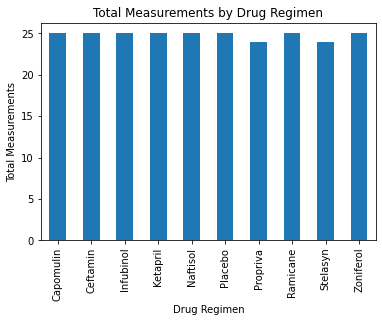

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements_bar_plot_df = merged_data_df.groupby("Drug Regimen")["Mouse ID"].nunique()
bar_plot = total_measurements_bar_plot_df.plot.bar(title="Total Measurements by Drug Regimen")

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Total Measurements")

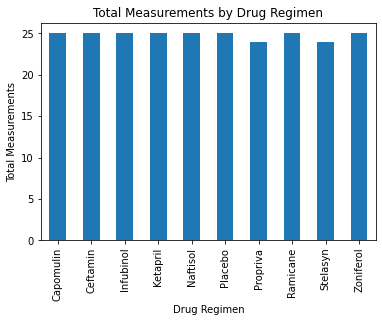

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

total_measurements_bar_plot_df.plot.bar()
plt.title("Total Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

(-1.1751841875488713,
 1.1303558271612584,
 -1.1928576872782923,
 1.126752816440996)

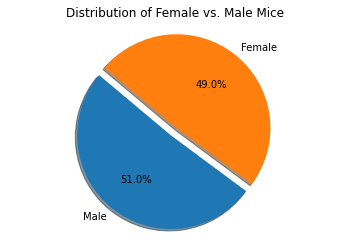

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_data = merged_data_df["Sex"].value_counts()
explode = (.1,0)
pie_chart = mouse_gender_data.plot.pie(title="Distribution of Female vs. Male Mice", explode = explode, autopct="%1.1f%%", startangle=140, shadow=True)
pie_chart.set_ylabel("")
pie_chart.axis("equal")

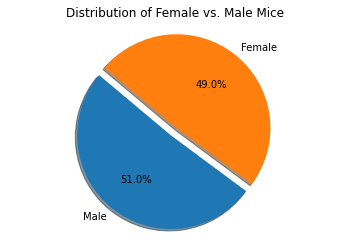

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_data, labels = mouse_gender_data.index.values,autopct="%1.1f%%", explode = explode, shadow=True, startangle=140)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(merged_data_df.groupby("Mouse ID")["Timepoint"].max()) 
greatest_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#inner join on Mouse ID and Timepoint gives us only the Max Timepoint value we're interested in 
max_timepoint_dataset_df = pd.merge(greatest_timepoint_df, merged_data_df, on=("Mouse ID", "Timepoint"))

max_timepoint_dataset_df.head(15)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_subset_df = max_timepoint_dataset_df.loc[max_timepoint_dataset_df['Drug Regimen'] == treatment]
    tumor_volume = treatment_subset_df["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    #lower and Upper bound calculations
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #outliers 
    #Count the number of times our values are below the lower bound, or above the upper bound
    outliers_count = (tumor_volume.loc[
        (treatment_subset_df["Tumor Volume (mm3)"] <= lower_bound) |
        (treatment_subset_df["Tumor Volume (mm3)"] >= upper_bound)]).count()
    
    print(f"------------------")
    print(f"Drug: {treatment}")
    print(f"------------------")
    print(f"    IQR: {iqr}")
    print(f"    Upper Bound: {upper_bound}")
    print(f"    Lower Bound: {lower_bound}")
    print(f"    Number of Outliers: {outliers_count}")

------------------
Drug: Capomulin
------------------
    IQR: 7.781863460000004
    Upper Bound: 51.83201549
    Lower Bound: 20.70456164999999
    Number of Outliers: 0
------------------
Drug: Ramicane
------------------
    IQR: 9.098536719999998
    Upper Bound: 54.30681135
    Lower Bound: 17.912664470000003
    Number of Outliers: 0
------------------
Drug: Infubinol
------------------
    IQR: 11.477135160000003
    Upper Bound: 82.74144559000001
    Lower Bound: 36.83290494999999
    Number of Outliers: 1
------------------
Drug: Ceftamin
------------------
    IQR: 15.577752179999997
    Upper Bound: 87.66645829999999
    Lower Bound: 25.355449580000002
    Number of Outliers: 0


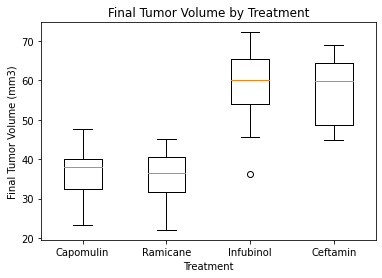

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_data)
plt.xticks([1, 2, 3, 4], treatments_list)
plt.title("Final Tumor Volume by Treatment")
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

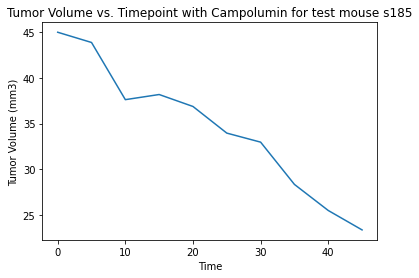

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_to_plot = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].values[0]
mouse_to_plot_df = merged_data_df.loc[merged_data_df["Mouse ID"] == mouse_to_plot]
mouse_to_plot_df

plt.plot(mouse_to_plot_df["Timepoint"], mouse_to_plot_df["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Timepoint with Campolumin for test mouse {mouse_to_plot}")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


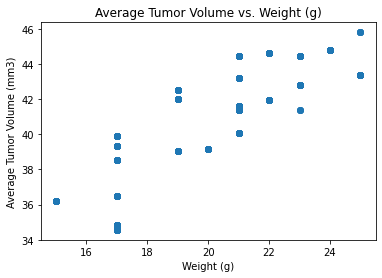

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment_df = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]
capomulin_treatment_df

average_tumor_volume_df = pd.DataFrame(capomulin_treatment_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
# average_tumor_volume_df

scatter_plot_df = pd.merge(capomulin_treatment_df, average_tumor_volume_df, on="Mouse ID")
scatter_plot_df = scatter_plot_df.rename(columns={"Tumor Volume (mm3)_x" : "Tumor Volume (mm3)", "Tumor Volume (mm3)_y":"Average Tumor Volume"})

# scatter_plot_df
x_axis = scatter_plot_df["Weight (g)"]
y_axis = scatter_plot_df["Average Tumor Volume"]

plt.scatter(x_axis, y_axis)
plt.title("Average Tumor Volume vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient: 0.83.


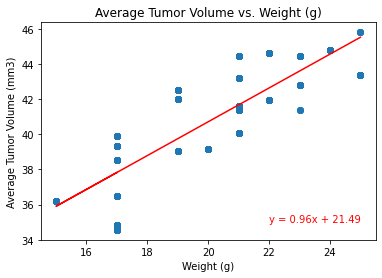

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficient
correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# line_equation

#Replot scatter plot with linear regression information
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
plt.annotate(line_equation, (22, 35), color="red")
plt.title("Average Tumor Volume vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
